<h1 id="tocheading">Table of Contents</h1>
<div id="toc"></div>

In [250]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>

In [251]:
import warnings
warnings.filterwarnings('ignore')

In [252]:
import nolds
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [253]:
df= pd.read_csv("intern_dataset.csv")

## The Roadmap to Exploratory fractal analyses
The python module used can be found here https://cschoel.github.io/nolds/index.html

    Step1: Split the data sets according to the classes
    Step2: Explore statistical properties of the data
    Step3: Each class is subject to an analysis technique to get the complexity 
    Step4: Results Analysis
    Step5: Conclusion

## Step 1: Split the data sets according to the classes

In [254]:
#the data frame is split to analyse the 3 classes seperately 
dfA= df[df.Label =='A']
dfB= df[df.Label =='B']
dfC= df[df.Label =='C']

## Step 2: Explore statistical properties of the data

In [255]:
print("Class A has ", dfA.shape,"records")
print("Class B has ", dfB.shape,"records")
print("Class C has ", dfC.shape,"records")

Class A has  (318000, 4) records
Class B has  (312000, 4) records
Class C has  (282000, 4) records


In [256]:
df.head()

,Time,Signal1,Signal2,Label
0,2017-08-14 11:37:49.791,33668.091913,0.856726,A
1,2017-08-14 11:37:49.801,32564.903040,0.856705,A
2,2017-08-14 11:37:49.811,31454.043305,0.856683,A
3,2017-08-14 11:37:49.821,30335.387166,0.856659,A
4,2017-08-14 11:37:49.831,29207.142938,0.856634,A


In [257]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 912000 entries, 0 to 911999
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   Time     912000 non-null  object 
 1   Signal1  912000 non-null  float64
 2   Signal2  912000 non-null  float64
 3   Label    912000 non-null  object 
dtypes: float64(2), object(2)
memory usage: 27.8+ MB


In [258]:
df.describe(include='all')

,Time,Signal1,Signal2,Label
count,912000,912000.000000,912000.000000,912000
unique,912000,NaN,NaN,3
top,2017-09-19 12:07:30.618,NaN,NaN,A
freq,1,NaN,NaN,318000
mean,NaN,31315.380483,0.398004,NaN
std,NaN,11700.734813,0.258119,NaN
min,NaN,-2934.328327,0.113841,NaN
25%,NaN,23851.958837,0.162522,NaN
50%,NaN,30650.812455,0.261210,NaN
75%,NaN,37933.966586,0.546605,NaN


## Step 3: Each class is subject to an analysis technique to get the complexity 

Below Each class of the two signals is analysed for DFA score and HURST exponent score.

In [259]:
#Creating a dataframe to store the results to analyse at the end 
result=pd.DataFrame(np.array([[1,'A','DFA',0],[1,'A','HURST',0],[2,'A','DFA',0],[2,'A','HURST',0],[1,'B','DFA',0],[1,'B','HURST',0],[2,'B','DFA',0],[2,'B','HURST',0],[1,'C','DFA',0],[1,'C','HURST',0],[2,'C','DFA',0],[2,'C','HURST',0]]),columns=['Signal','Class','Test','Value'])

## Explanation of Detrended fluctuation analysis
Source :https://cschoel.github.io/nolds/index.html

Explanation of DFA:
Detrended fluctuation analysis, much like the Hurst exponent, is used to find long-term statistical dependencies in time series.

The idea behind DFA originates from the definition of self-affine processes. A process X is said to be self-affine if the standard deviation of the values within a window of length n changes with the window length factor L in a power law:

std(X,L * n) = L^H * std(X, n)

where std(X, k) is the standard deviation of the process X calculated over windows of size k. In this equation, H is called the Hurst parameter, which behaves indeed very similar to the Hurst exponent.

Like the Hurst exponent, H can be obtained from a time series by calculating std(X,n) for different n and fitting a straight line to the plot of log(std(X,n)) versus log(n).

To calculate a single std(X,n), the time series is split into windows of equal length n, so that the ith window of this size has the form

W_(n,i) = [x_i, x_(i+1), x_(i+2), … x_(i+n-1)]

The value std(X,n) is then obtained by calculating std(W_(n,i)) for each i and averaging the obtained values over i.

The aforementioned definition of self-affinity, however, assumes that the process is non-stationary (i.e. that the standard deviation changes over time) and it is highly influenced by local and global trends of the time series.

To overcome these problems, an estimate alpha of H is calculated by using a “walk” or “signal profile” instead of the raw time series. This walk is obtained by substracting the mean and then taking the cumulative sum of the original time series. The local trends are removed for each window separately by fitting a polynomial p_(n,i) to the window W_(n,i) and then calculating W’_(n,i) = W_(n,i) - p_(n,i) (element-wise substraction).

We then calculate std(X,n) as before only using the “detrended” window W’_(n,i) instead of W_(n,i). Instead of H we obtain the parameter alpha from the line fitting.

For alpha < 1 the underlying process is stationary and can be modelled as fractional Gaussian noise with H = alpha. This means for alpha = 0.5 we have no correlation or “memory”, for 0.5 < alpha < 1 we have a memory with positive correlation and for alpha < 0.5 the correlation is negative.

For alpha > 1 the underlying process is non-stationary and can be modeled as fractional Brownian motion with H = alpha - 1.

### DFA of Signal1 Class A

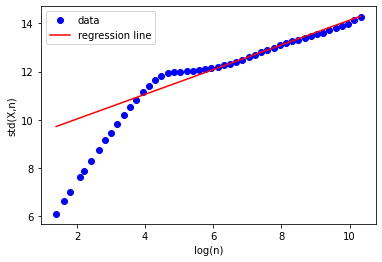

0.5114918677093938

In [260]:
r = nolds.dfa(dfA.Signal1,debug_plot=True)
r


In [261]:
#Appending to results data frame
result.loc[(result.Signal=='1') & (result.Class =='A') & (result.Test == 'DFA'),"Value"] = r

##### Observation
Signal 1 of Class A has a low DFA score hence suggesting a high complexity. This is seen in the graph with small log(n) or in other words when the number of windows is small the data line and the regression line are not close to each other. Suggesting the details of the Signal are lost when the magnitude of the scale used to measure is large hence intricate details are lost.

### DFA of Signal2 Class A

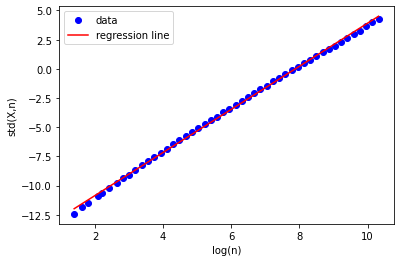

1.8449455786234414

In [262]:
r=nolds.dfa(dfA.Signal2,debug_plot=True)
r

In [263]:
#Appending to results data frame
result.loc[(result.Signal=='2') & (result.Class =='A') & (result.Test == 'DFA'),'Value'] = r

##### Observation
Signal 2 of Class A has a high DFA score hence suggesting a low complexity. This is seen in the graph with small log(n) or in other words even when the number of windows is small the data line and the regression line are still close to each other.

### DFA of Signal1 Class B

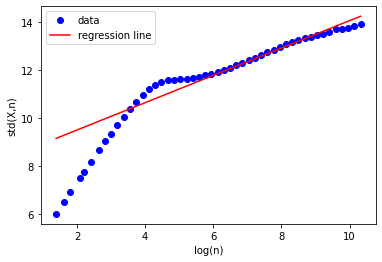

0.5704516814209171

In [264]:
r = nolds.dfa(dfB.Signal1,debug_plot=True)
r

In [265]:
#Appending to results data frame
result.loc[(result.Signal=='1') & (result.Class =='B') & (result.Test == 'DFA'),'Value'] = r

##### Observation
Signal 1 of Class B has a low DFA score hence suggesting a high complexity. This is seen in the graph with small log(n) or in other words when the number of windows is small the data line and the regression line are not close to each other. Suggesting the details of the Signal are lost when the magnitude of the scale used to measure is large hence intricate details are lost.

### DFA of Signal2 Class B

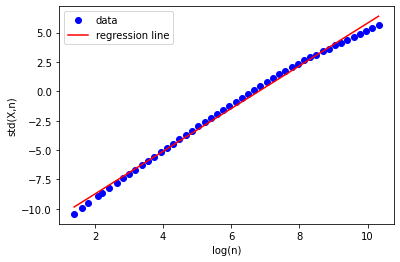

1.817671427084578

In [266]:
r = nolds.dfa(dfB.Signal2,debug_plot=True)
r

In [267]:
#Appending to results data frame
result.loc[(result.Signal=='2') & (result.Class =='B') & (result.Test == 'DFA'),'Value'] = r

##### Observation
Signal 2 of Class B has a high DFA hence suggesting a low complexity. This is seen in the graph as log(n) or in other words the number of windows  is small the data line and the regression line are still close to each other. 

### DFA of Signal1 Class C

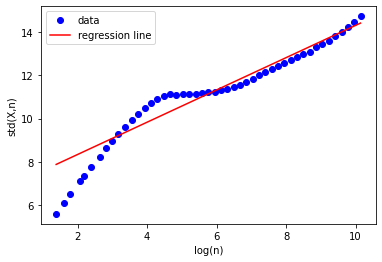

0.7462981917244241

In [268]:
r = nolds.dfa(dfC.Signal1,debug_plot=True)
r

In [269]:
#Appending to results data frame
result.loc[(result.Signal=='1') & (result.Class =='C') & (result.Test == 'DFA'),'Value'] = r

##### Observation
Signal 1 of Class C has a low DFA score hence suggesting a high complexity. This is seen in the graph with small log(n) or in other words when the number of windows is small the data line and the regression line are not close to each other. Suggesting the details of the Signal are lost when the magnitude of the scale used to measure is large hence intricate details are lost.

### DFA of Signal2 Class C

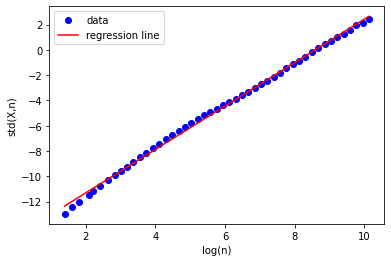

1.7160380861831217

In [270]:
r= nolds.dfa(dfC.Signal2,debug_plot=True)
r

In [271]:
#Appending to results data frame
result.loc[(result.Signal=='2') & (result.Class =='C') & (result.Test == 'DFA'),'Value'] = r

##### Observation
Signal 2 of Class C has a high DFA hence suggesting a low complexity. This is seen in the graph as log(n) or in other words the number of windows  is small the data line and the regression line are still close to each other.

## Explanation of Hurst exponent:
Source:https://cschoel.github.io/nolds/index.html

The Hurst exponent is a measure for the “long-term memory” of a time series, meaning the long statistical dependencies in the data that do not originate from cycles.

It originates from H.E. Hursts observations of the problem of long-term storage in water reservoirs. If x_i is the discharge of a river in year i and we observe this discharge for N years, we can calculate the storage capacity that would be required to keep the discharge steady at its mean value.

To do so, we first substract the mean over all x_i from the individual x_i to obtain the departures x’_i from the mean for each year i. As the excess or deficit in discharge always carrys over from year i to year i+1, we need to examine the cumulative sum of x’_i, denoted by y_i. This cumulative sum represents the filling of our hypothetical storage. If the sum is above 0, we are storing excess discharge from the river, if it is below zero we have compensated a deficit in discharge by releasing water from the storage. The range (maximum - minimum) R of y_i therefore represents the total capacity required for the storage.

Hurst showed that this value follows a steady trend for varying N if it is normalized by the standard deviation sigma over the x_i. Namely he obtained the following formula:

R/sigma = (N/2)^K

In this equation, K is called the Hurst exponent. Its value is 0.5 for white noise, but becomes greater for time series that exhibit some positive dependency on previous values. For negative dependencies it becomes less than 0.5.

Explanation of the algorithm:
The rescaled range (R/S) approach is directly derived from Hurst’s definition. The time series of length N is split into non-overlapping subseries of length n. Then, R and S (S = sigma) are calculated for each subseries and the mean is taken over all subseries yielding (R/S)_n. This process is repeated for several lengths n. Finally, the exponent K is obtained by fitting a straight line to the plot of log((R/S)_n) vs log(n).

There seems to be no consensus how to chose the subseries lenghts n. This function therefore leaves the choice to the user. The module provides some utility functions for “typical” values:

binary_n: N/2, N/4, N/8, …
logarithmic_n: min_n, min_n * f, min_n * f^2, …

### Hurst Exponent of Signal1 Class A

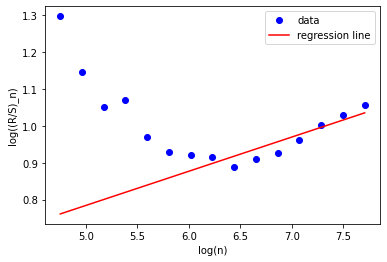

0.5926950673252946

In [272]:
r = nolds.hurst_rs(dfA.Signal1,debug_plot=True)
r

In [273]:
#Appending to results data frame
result.loc[(result.Signal=='1') & (result.Class =='A') & (result.Test == 'HURST'),'Value'] = r

##### Observation
Signal 1 of Class A has a low Hurst score and greater than 0.5 hence suggesting a high complexity.For self-similar time series, H is directly related to fractal dimension, D, where 1 < D < 2, such that D = 2 - H. The values of the Hurst exponent vary between 0 and 1, with lower values indicating a rougher trend, high volatility, and more roughness. Sence hurst_rs score is closer to 0.5 it is more complex. A value H in the range 0.5–1 indicates a time series with long-term positive autocorrelation, meaning both that a high value in the series will probably be followed by another high value and that the values a long time into the future will also tend to be high.

As seen in the graph with small log(n) or in other words when the number of windows is small the data line and the regression line are not close to each other. Suggesting the details of the Signal are lost when the magnitude of the scale used to measure is large and hence intricate details are lost.

### Hurst Exponent of Signal2 Class A

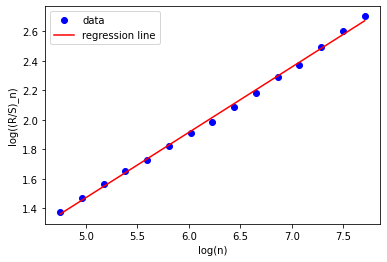

0.9436455006528948

In [274]:
r = nolds.hurst_rs(dfA.Signal2,debug_plot=True)
r

In [275]:
#Appending to results data frame
result.loc[(result.Signal=='2') & (result.Class =='A') & (result.Test == 'HURST'),'Value'] = r

##### Observation
Signal 2 of Class A has a high Hurst score and greater than 0.5 hence suggesting a low complexity.For self-similar time series, H is directly related to fractal dimension, D, where 1 < D < 2, such that D = 2 - H. The values of the Hurst exponent vary between 0 and 1, with higher values indicating a smoother trend, less volatility, and less roughness. Sence hurst_rs score is closer to 1 it is less complex. A value H in the range 0.5–1 indicates a time series with long-term positive autocorrelation, meaning both that a high value in the series will probably be followed by another high value and that the values a long time into the future will also tend to be high.

As seen in the graph with small log(n) or in other words when the number of windows is small the data line and the regression line are close to each other. Suggesting the details of the Signal are not lost when the magnitude of the scale used to measure is large and intricate details are not lost.

### Hurst Exponent of Signal1 Class B

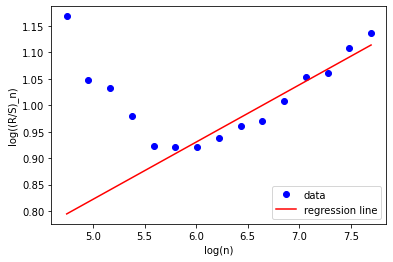

0.6082193903732962

In [276]:
r =nolds.hurst_rs(dfB.Signal1,debug_plot=True)
r

In [277]:
#Appending to results data frame
result.loc[(result.Signal=='1') & (result.Class =='B') & (result.Test == 'HURST'),'Value'] = r

##### Observation
Signal 1 of Class B has a low Hurst score and greater than 0.5 hence suggesting a high complexity.For self-similar time series, H is directly related to fractal dimension, D, where 1 < D < 2, such that D = 2 - H. The values of the Hurst exponent vary between 0 and 1, with lower values indicating a rougher trend, high volatility, and more roughness. Sence hurst_rs score is closer to 0.5 it is more complex. A value H in the range 0.5–1 indicates a time series with long-term positive autocorrelation, meaning both that a high value in the series will probably be followed by another high value and that the values a long time into the future will also tend to be high.

As seen in the graph with small log(n) or in other words when the number of windows is small the data line and the regression line are not close to each other. Suggesting the details of the Signal are lost when the magnitude of the scale used to measure is large and hence intricate details are lost.

### Hurst Exponent of Signal2 Class B

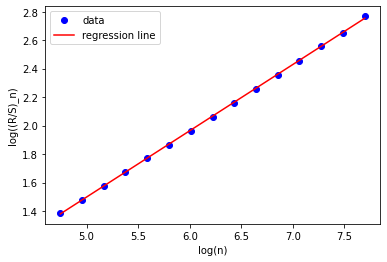

0.9656017582527001

In [278]:
r = nolds.hurst_rs(dfB.Signal2,debug_plot=True)
r

In [279]:
#Appending to results data frame
result.loc[(result.Signal=='2') & (result.Class =='B') & (result.Test == 'HURST'),'Value'] = r

##### Observation
Signal 2 of Class B has a high Hurst score and greater than 0.5 hence suggesting a low complexity.For self-similar time series, H is directly related to fractal dimension, D, where 1 < D < 2, such that D = 2 - H. The values of the Hurst exponent vary between 0 and 1, with higher values indicating a smoother trend, less volatility, and less roughness. Sence hurst_rs score is closer to 1 it is less complex. A value H in the range 0.5–1 indicates a time series with long-term positive autocorrelation, meaning both that a high value in the series will probably be followed by another high value and that the values a long time into the future will also tend to be high.

As seen in the graph with small log(n) or in other words when the number of windows is small the data line and the regression line are close to each other. Suggesting the details of the Signal are not lost when the magnitude of the scale used to measure is large and intricate details are not lost.

### Hurst Exponent of Signal1 Class C

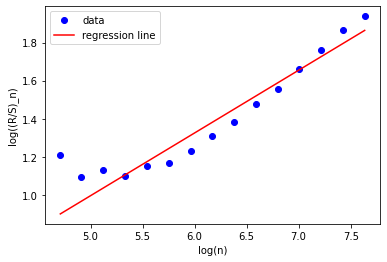

0.8292981622514974

In [280]:
r = nolds.hurst_rs(dfC.Signal1,debug_plot=True)
r

In [281]:
#Appending to results data frame
result.loc[(result.Signal=='1') & (result.Class =='C') & (result.Test == 'HURST'),'Value'] = r

##### Observation
Signal 1 of Class B has a low Hurst score and greater than 0.5 hence suggesting a high complexity. For self-similar time series, H is directly related to fractal dimension, D, where 1 < D < 2, such that D = 2 - H. The values of the Hurst exponent vary between 0 and 1, with lower values indicating a rougher trend, high volatility, and more roughness. Sence hurst_rs score is closer to 0.5 it is more complex. A value H in the range 0.5–1 indicates a time series with long-term positive autocorrelation, meaning both that a high value in the series will probably be followed by another high value and that the values a long time into the future will also tend to be high.

As seen in the graph with small log(n) or in other words when the number of windows is small the data line and the regression line are not close to each other. Suggesting the details of the Signal are lost when the magnitude of the scale used to measure is large and hence intricate details are lost.

### Hurst Exponent ofe Signal2 Class C

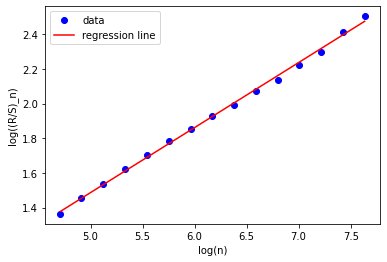

0.8748319171563559

In [282]:
r =nolds.hurst_rs(dfC.Signal2,debug_plot=True)
r

In [283]:
#Appending to results data frame
result.loc[(result.Signal=='2') & (result.Class =='C') & (result.Test == 'HURST'),'Value'] = r

##### Observation
Signal 2 of Class C has a high Hurst score and greater than 0.5 hence suggesting a low complexity.For self-similar time series, H is directly related to fractal dimension, D, where 1 < D < 2, such that D = 2 - H. The values of the Hurst exponent vary between 0 and 1, with higher values indicating a smoother trend, less volatility, and less roughness. Sence hurst_rs score is closer to 1 it is less complex. A value H in the range 0.5–1 indicates a time series with long-term positive autocorrelation, meaning both that a high value in the series will probably be followed by another high value and that the values a long time into the future will also tend to be high.

As seen in the graph with small log(n) or in other words when the number of windows is small the data line and the regression line are close to each other. Suggesting the details of the Signal are not lost when the magnitude of the scale used to measure is large and intricate details are not lost.

## Step 4: Result Analysis

In [284]:
result

,Signal,Class,Test,Value
0,1,A,DFA,0.511492
1,1,A,HURST,0.592695
2,2,A,DFA,1.844946
3,2,A,HURST,0.943646
4,1,B,DFA,0.570452
5,1,B,HURST,0.608219
6,2,B,DFA,1.817671
7,2,B,HURST,0.965602
8,1,C,DFA,0.746298
9,1,C,HURST,0.829298


In [285]:
dfa_result = result[result.Test=="DFA"]
dfa_result

,Signal,Class,Test,Value
0,1,A,DFA,0.511492
2,2,A,DFA,1.844946
4,1,B,DFA,0.570452
6,2,B,DFA,1.817671
8,1,C,DFA,0.746298
10,2,C,DFA,1.716038


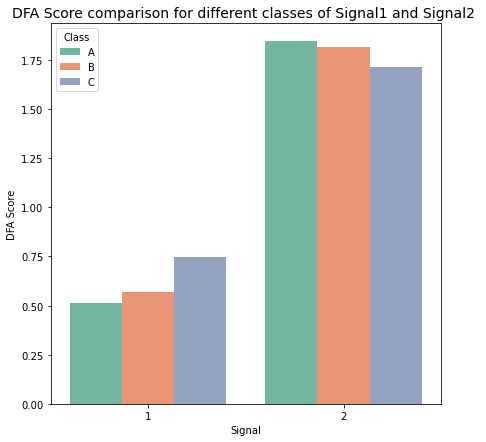

In [286]:
plt.figure(figsize=(7,7))
plt.title("DFA Score comparison for different classes of Signal1 and Signal2 ", fontsize=14)
sns.barplot(data = dfa_result,x='Signal',hue ='Class',y='Value',palette='Set2');
plt.ylabel("DFA Score");


##### Observation

Signal 1 of Class A has the lowest DFA score hence suggesting the highest complexity for the whole dataset.

Bifurcating the dataset for the two signals; for signal 2 in particular it can be said that Class C of Signal2 has the highest complexity since it has the lowest DFA score.

In [287]:
hurst_result = result[result.Test=="HURST"]
hurst_result

,Signal,Class,Test,Value
1,1,A,HURST,0.592695
3,2,A,HURST,0.943646
5,1,B,HURST,0.608219
7,2,B,HURST,0.965602
9,1,C,HURST,0.829298
11,2,C,HURST,0.874832


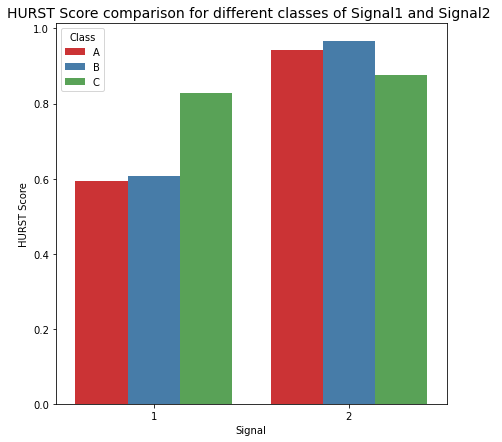

In [288]:
plt.figure(figsize=(7,7))
plt.title("HURST Score comparison for different classes of Signal1 and Signal2 ", fontsize=14)
sns.barplot(data = hurst_result,x='Signal',hue ='Class',y='Value',palette='Set1');
plt.ylabel("HURST Score");


##### Observation

Signal 1 of Class A has a lowest Hurst score suggesting the highest complexity. The Hurst Score is supporting the DFA score result as in the graph above.

Bifurcating the dataset for the two signals; for signal 2 in particular it can be said that Class C of Signal2 has the highest complexity since it has the lowest HURST score.

## Step 5: Conclusion

Signal 1 of Class A has a low DFA  and low HURST score amongst all classes and both signals. This was seen in the bar graphs drawn above hence suggesting the highest complexity. This has been also supported by the line graphs drawn under the respective sections of analysis. It was seen in the graph that with small log(n) or in other words when the number of windows is small the data line and the regression line are not close to each other. Suggesting the details of the Signal are lost when the magnitude of the scale used to measure is large hence intricate details are lost.

The Signal 1 of Class A is the highest complexity for the whole data set.

When Signal 2 is considered individually Class C has the highest complexity.


